In [1]:
# importing necessary libraries
import numpy as np
import scipy.stats as spstats
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


%matplotlib inline
# matplotlib
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

In [2]:
np.linspace(0,0.5,12)

array([0.        , 0.04545455, 0.09090909, 0.13636364, 0.18181818,
       0.22727273, 0.27272727, 0.31818182, 0.36363636, 0.40909091,
       0.45454545, 0.5       ])

In [3]:
# Reading in the dataset
poke_df = pd.read_csv("pokemon.csv")
poke_df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [4]:
poke_df[["hp","attack","defense"]].describe()

,hp,attack,defense
count,807.000000,807.000000,807.000000
mean,68.748451,76.086741,71.726146
std,26.032808,29.544598,29.730228
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,67.000000
75%,80.000000,95.000000,89.000000
max,255.000000,181.000000,230.000000


In [5]:
atk_def = poke_df[['attack', 'defense']]

In [6]:
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  131.,   211., 17161., 27641., 44521.],
       [  127.,    53., 16129.,  6731.,  2809.],
       [  112.,    75., 12544.,  8400.,  5625.]])

In [7]:
pd.unique(poke_df["generation_id"])

array([1, 2, 3, 4, 5, 6, 7])

In [8]:
# gen_le = LabelEncoder()
# genre_label = gen_le.fit_transform(vg_df["Genre"])
# vg_df["Genre_label"] = genre_label

In [9]:
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(poke_df[['gen_Label']]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)
# encode legendary status labels using one-hot encoding scheme

KeyError: "None of [Index(['gen_Label'], dtype='object')] are in the [columns]"

In [ ]:
vg_df = pd.read_csv("vgsales.csv", encoding="utf-8")
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

In [ ]:
genres = pd.unique(vg_df["Genre"])
genres

In [ ]:
gle = LabelEncoder()
gle.fit_transform(vg_df["Genre"])
genre_labels = {index: label for index, label in enumerate(gle.classes_)}
genre_labels

In [10]:
import numpy as np
import pandas as pd
import re
import nltk

In [11]:
corpus = ['The sky is blue and beautiful.',
             'Love this blue and beautiful sky!',
             'The quick brown fox jumps over the lazy dog.',
             'The brown fox is quick and the blue dog is lazy!',
             'The sky is very blue and the sky is very beautiful today',
             'The dog is lazy but the brown fox is quick!']

labels = ['weather', 'weather', 'animals', 'animals', 'weather', 'animals']

corpus  = np.array(corpus)

In [12]:
corpus_df = pd.DataFrame({'Document': corpus,
                         "Category": labels})
corpus_df = corpus_df[["Document", "Category"]]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,The brown fox is quick and the blue dog is lazy!,animals
4,The sky is very blue and the sky is very beaut...,weather
5,The dog is lazy but the brown fox is quick!,animals


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/prince_tesla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words("english")
def normalize_document(doc):
       # lower case and remove special characters\whitespaces
       doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
       doc = doc.lower()
       doc = doc.strip()
       # tokenize document
       tokens = wpt.tokenize(doc)
       # filter stopwords out of document
       filtered_tokens = [token for token in tokens if token not in stop_words]
       # re-create document from filtered tokens
       doc = ' '.join(filtered_tokens)
       return doc
    
    
normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog', 'brown fox quick blue dog lazy',
       'sky blue sky beautiful today', 'dog lazy brown fox quick'],
      dtype='<U30')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df = 0., max_df = 1.)

cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0]])

In [16]:
vocab = cv.get_feature_names()
pd.DataFrame(cv_matrix, columns=vocab)

,beautiful,blue,brown,dog,fox,jumps,lazy,love,quick,sky,today
0,1,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,1,0,1,0
2,0,0,1,1,1,1,1,0,1,0,0
3,0,1,1,1,1,0,1,0,1,0,0
4,1,1,0,0,0,0,0,0,0,2,1
5,0,0,1,1,1,0,1,0,1,0,0


In [17]:
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)
bv_matrix = bv_matrix.toarray()
bv_matrix

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]])

In [18]:
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,brown fox,dog lazy,fox jumps,fox quick,jumps lazy,lazy brown,lazy dog,love blue,quick blue,quick brown,sky beautiful,sky blue
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
3,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
5,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame(tv_matrix, columns=vocab)

,beautiful,blue,brown,dog,fox,jumps,lazy,love,quick,sky,today
0,0.604749,0.518224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.604749,0.000000
1,0.455454,0.390289,0.000000,0.000000,0.000000,0.000000,0.000000,0.657873,0.000000,0.455454,0.000000
2,0.000000,0.000000,0.375653,0.375653,0.375653,0.542607,0.375653,0.000000,0.375653,0.000000,0.000000
3,0.000000,0.357850,0.417599,0.417599,0.417599,0.000000,0.417599,0.000000,0.417599,0.000000,0.000000
4,0.357583,0.306421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715166,0.516505
5,0.000000,0.000000,0.447214,0.447214,0.447214,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity =  cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(cosine_similarity)
similarity_df

,0,1,2,3,4,5
0,1.000000,0.753128,0.000000,0.185447,0.807539,0.000000
1,0.753128,1.000000,0.000000,0.139665,0.608181,0.000000
2,0.000000,0.000000,1.000000,0.784362,0.000000,0.839987
3,0.185447,0.139665,0.784362,1.000000,0.109653,0.933779
4,0.807539,0.608181,0.000000,0.109653,1.000000,0.000000
5,0.000000,0.000000,0.839987,0.933779,0.000000,1.000000


In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit_transform(similarity_df)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,1
3,The brown fox is quick and the blue dog is lazy!,animals,1
4,The sky is very blue and the sky is very beaut...,weather,0
5,The dog is lazy but the brown fox is quick!,animals,1


In [22]:
from sklearn.decomposition import LatentDirichletAllocation
lda =  LatentDirichletAllocation(n_components=2, max_iter=100, random_state=42)
dt_matrix = lda.fit_transform(tv_matrix)
features = pd.DataFrame(dt_matrix, columns=["T1", "T2"])
features

,T1,T2
0,0.190548,0.809452
1,0.176804,0.823196
2,0.846184,0.153816
3,0.814863,0.185137
4,0.180516,0.819484
5,0.839172,0.160828


In [23]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab,topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('brown', 1.7273638692668467), ('dog', 1.7273638692668467), ('fox', 1.7273638692668467), ('lazy', 1.7273638692668467), ('quick', 1.7273638692668467), ('jumps', 1.0328325272484777), ('blue', 0.7731573162915626)]

[('sky', 2.264386643135622), ('beautiful', 1.9068269319456903), ('blue', 1.7996282104933266), ('love', 1.148127242397004), ('today', 1.0068251160429935)]



In [24]:
from gensim.models import word2vec
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

feature_size = 10
window_context = 10
sample = 1e-3
min_word_count = 1

w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size, window=window_context,
                              min_count=min_word_count, sample=sample)
w2v_model.wv['sky']

array([ 0.07380505, -0.01533473, -0.04536615,  0.06554051, -0.0486016 ,
       -0.01816018,  0.0287658 ,  0.00991874, -0.08285215, -0.09448819],
      dtype=float32)

In [25]:
import datetime
import numpy as np
import pandas as pd
from dateutil.parser import parser
import pytz

In [26]:
time_stamps = ['2015-03-08 10:30:00.360000+00:00', '2017-07-13 15:45:05.755000-07:00',
'2012-01-20 22:30:00.254000+05:30', '2016-12-25 00:30:00.000000+10:00']

df = pd.DataFrame(time_stamps, columns=["Time"])
df

,Time
0,2015-03-08 10:30:00.360000+00:00
1,2017-07-13 15:45:05.755000-07:00
2,2012-01-20 22:30:00.254000+05:30
3,2016-12-25 00:30:00.000000+10:00


In [27]:
ts_objs = np.array([pd.Timestamp(item) for item in np.array(df.Time)])
df["TS_objs"] = ts_objs
df

,Time,TS_objs
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 15:45:05.755000-07:00
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 22:30:00.254000+05:30
3,2016-12-25 00:30:00.000000+10:00,2016-12-25 00:30:00+10:00


In [28]:
df["Year"] = df["TS_objs"].apply(lambda x:x.year)
df["Month"] = df["TS_objs"].apply(lambda x:x.month)
df["Day"] = df["TS_objs"].apply(lambda x:x.day)
df["DayOfWeek"] = df["TS_objs"].apply(lambda x:x.dayofweek)
df["DayName"] = df["TS_objs"].apply(lambda x:x.day_name().title())
df["WeekOfYear"] = df["TS_objs"].apply(lambda x:x.weekofyear)
df["Quarter"] = df["TS_objs"].apply(lambda x:x.quarter)
df["DayOfYear"] = df["TS_objs"].apply(lambda x:x.dayofyear)



df["Hour"] = df["TS_objs"].apply(lambda x:x.hour)
df["Minute"] = df["TS_objs"].apply(lambda x:x.minute)
df["Seconds"] = df["TS_objs"].apply(lambda x:x.second)
df["MUseconds"] = df["TS_objs"].apply(lambda x:x.microsecond)
df["UTCoffset"] = df["TS_objs"].apply(lambda x:x.utcoffset())


df

,Time,TS_objs,Year,Month,Day,DayOfWeek,DayName,WeekOfYear,Quarter,DayOfYear,Hour,Minute,Seconds,MUseconds,UTCoffset
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,2015,3,8,6,Sunday,10,1,67,10,30,0,360000,0 days 00:00:00
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 15:45:05.755000-07:00,2017,7,13,3,Thursday,28,3,194,15,45,5,755000,-1 days +17:00:00
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 22:30:00.254000+05:30,2012,1,20,4,Friday,3,1,20,22,30,0,254000,0 days 05:30:00
3,2016-12-25 00:30:00.000000+10:00,2016-12-25 00:30:00+10:00,2016,12,25,6,Sunday,51,4,360,0,30,0,0,0 days 10:00:00


In [29]:
hour_bins = [-1, 5, 11, 16, 21, 23]
day_bin = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
df["TimeOfDayBin"] = pd.cut(df["Hour"], bins=hour_bins, labels=day_bin)
df

,Time,TS_objs,Year,Month,Day,DayOfWeek,DayName,WeekOfYear,Quarter,DayOfYear,Hour,Minute,Seconds,MUseconds,UTCoffset,TimeOfDayBin
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,2015,3,8,6,Sunday,10,1,67,10,30,0,360000,0 days 00:00:00,Morning
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 15:45:05.755000-07:00,2017,7,13,3,Thursday,28,3,194,15,45,5,755000,-1 days +17:00:00,Afternoon
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 22:30:00.254000+05:30,2012,1,20,4,Friday,3,1,20,22,30,0,254000,0 days 05:30:00,Night
3,2016-12-25 00:30:00.000000+10:00,2016-12-25 00:30:00+10:00,2016,12,25,6,Sunday,51,4,360,0,30,0,0,0 days 10:00:00,Late Night


In [30]:
df["TZ_info"] = df["TS_objs"].apply(lambda x:x.tzinfo)
df['TimeZones'] = df['TS_objs'].apply(lambda d: list({d.astimezone(tz).tzname()
                                                     for tz in map(pytz.timezone,
                                                    pytz.all_timezones_set)
                                                     if d.astimezone(tz).utcoffset() == d.utcoffset()}))
df

,Time,TS_objs,Year,Month,Day,DayOfWeek,DayName,WeekOfYear,Quarter,DayOfYear,Hour,Minute,Seconds,MUseconds,UTCoffset,TimeOfDayBin,TZ_info,TimeZones
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,2015,3,8,6,Sunday,10,1,67,10,30,0,360000,0 days 00:00:00,Morning,UTC,"[UTC, WET, +00, GMT]"
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 15:45:05.755000-07:00,2017,7,13,3,Thursday,28,3,194,15,45,5,755000,-1 days +17:00:00,Afternoon,pytz.FixedOffset(-420),"[MST, PDT, -07]"
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 22:30:00.254000+05:30,2012,1,20,4,Friday,3,1,20,22,30,0,254000,0 days 05:30:00,Night,pytz.FixedOffset(330),"[+0530, IST]"
3,2016-12-25 00:30:00.000000+10:00,2016-12-25 00:30:00+10:00,2016,12,25,6,Sunday,51,4,360,0,30,0,0,0 days 10:00:00,Late Night,pytz.FixedOffset(600),"[AEST, +10, ChST]"


In [31]:
df['TimeUTC'] = df['TS_objs'].apply(lambda d: d.tz_convert(pytz.utc))
df['Epoch'] = df['TS_objs'].apply(lambda d: d.timestamp())
df['GregOrdinal'] = df['TS_objs'].apply(lambda d: d.toordinal())

df

,Time,TS_objs,Year,Month,Day,DayOfWeek,DayName,WeekOfYear,Quarter,DayOfYear,...,Minute,Seconds,MUseconds,UTCoffset,TimeOfDayBin,TZ_info,TimeZones,TimeUTC,Epoch,GregOrdinal
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,2015,3,8,6,Sunday,10,1,67,...,30,0,360000,0 days 00:00:00,Morning,UTC,"[UTC, WET, +00, GMT]",2015-03-08 10:30:00.360000+00:00,1.425811e+09,735665
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 15:45:05.755000-07:00,2017,7,13,3,Thursday,28,3,194,...,45,5,755000,-1 days +17:00:00,Afternoon,pytz.FixedOffset(-420),"[MST, PDT, -07]",2017-07-13 22:45:05.755000+00:00,1.499986e+09,736523
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 22:30:00.254000+05:30,2012,1,20,4,Friday,3,1,20,...,30,0,254000,0 days 05:30:00,Night,pytz.FixedOffset(330),"[+0530, IST]",2012-01-20 17:00:00.254000+00:00,1.327079e+09,734522
3,2016-12-25 00:30:00.000000+10:00,2016-12-25 00:30:00+10:00,2016,12,25,6,Sunday,51,4,360,...,30,0,0,0 days 10:00:00,Late Night,pytz.FixedOffset(600),"[AEST, +10, ChST]",2016-12-24 14:30:00+00:00,1.482590e+09,736323


In [32]:
import datetime
curr_ts = datetime.datetime.now(pytz.utc)
df['DaysElapsedEpoch'] = (curr_ts.timestamp() - df['Epoch']) / (3600*24)
df['DaysElapsedEpoch'] = (curr_ts.toordinal() - df['GregOrdinal'])

df

,Time,TS_objs,Year,Month,Day,DayOfWeek,DayName,WeekOfYear,Quarter,DayOfYear,...,Seconds,MUseconds,UTCoffset,TimeOfDayBin,TZ_info,TimeZones,TimeUTC,Epoch,GregOrdinal,DaysElapsedEpoch
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,2015,3,8,6,Sunday,10,1,67,...,0,360000,0 days 00:00:00,Morning,UTC,"[UTC, WET, +00, GMT]",2015-03-08 10:30:00.360000+00:00,1.425811e+09,735665,2776
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 15:45:05.755000-07:00,2017,7,13,3,Thursday,28,3,194,...,5,755000,-1 days +17:00:00,Afternoon,pytz.FixedOffset(-420),"[MST, PDT, -07]",2017-07-13 22:45:05.755000+00:00,1.499986e+09,736523,1918
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 22:30:00.254000+05:30,2012,1,20,4,Friday,3,1,20,...,0,254000,0 days 05:30:00,Night,pytz.FixedOffset(330),"[+0530, IST]",2012-01-20 17:00:00.254000+00:00,1.327079e+09,734522,3919
3,2016-12-25 00:30:00.000000+10:00,2016-12-25 00:30:00+10:00,2016,12,25,6,Sunday,51,4,360,...,0,0,0 days 10:00:00,Late Night,pytz.FixedOffset(600),"[AEST, +10, ChST]",2016-12-24 14:30:00+00:00,1.482590e+09,736323,2118


In [33]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

In [37]:
c = io.imread('minion.png')
d = io.imread('minion_2.png')
df = pd.DataFrame(['c', 'd'], columns=['Image'])
df

,Image
0,c
1,d


cat image shape:
 (489, 693, 4)
dog image shape:
 (2048, 2048, 4)


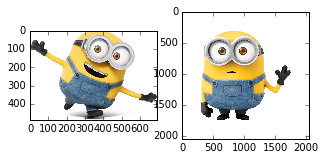

In [38]:
print(f"cat image shape:\n {c.shape}")
print(f"dog image shape:\n {d.shape}")


fig = plt.figure(figsize=(5,8))
axs_1 = fig.add_subplot(1,2,1)
axs_1.imshow(c)
axs_2 = fig.add_subplot(1,2,2)
axs_2.imshow(d)

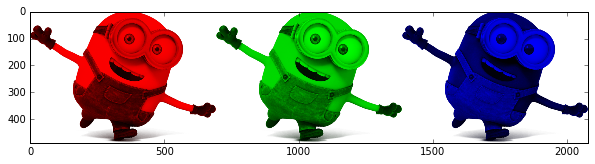

In [40]:
c_red = c.copy() # Red Channel
c_red[:,:,1] = c_red[:,:,2] = 0 # set G,B pixels = 0
c_green = c.copy() # Green Channel
c_green[:,:,0] = c_green[:,:,2] = 0 # set R,B pixels = 0
c_blue = c.copy() # Blue Channel
c_blue[:,:,0] = c_blue[:,:,1] = 0 # set R,G pixels = 0

image = np.concatenate((c_red, c_green, c_blue), axis=1)
plt.figure(figsize=(10,8))
plt.imshow(image)

In [36]:
pd.Timestamp().m

TypeError: function missing required argument 'year' (pos 1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
x = np.random.normal(loc=1,scale=2,size=(2,3))
x

In [ ]:
y = np.random.binomial(n=10, p=0.5, size=(1000))
sns.distplot(y,kde=False)
y

In [ ]:
sns.distplot(np.random.poisson(lam=2, size=1000))